# sklearnの確認問題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします。

In [3]:
import pandas as pd

## 前準備




### データの読み取り
scikit-learnから提供される`iris`というデータセットを読み込みます。

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

#説明変数の読み取り
data = iris.data
feature_names = iris.feature_names
df_data = pd.DataFrame(data=data, columns=feature_names)

#目的変数の読み取り
target = iris.target
target_names = iris.target_names
df_target = pd.DataFrame(data=target, columns=['target'])

### 問1. 説明変数の把握

1.1. `df_data` の先頭五行を表示してください。

In [5]:
df_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


1.2. `df_data` の行数と列数を表示しましょう。

In [6]:
print("行数:", df_data.shape[0])
print("列数:", df_data.shape[1])

行数: 150
列数: 4


1.3. `df_data` の各列の `mean`, `count`, `std` などの基本特徴量を表示しましょう。


In [8]:
df_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


1.4. `df_data` に欠損値がないかを確認しましょう。

In [11]:
count = df_data.isnull().sum()
count

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### 問2. 目的変数の把握

2.1. `df_target` のうち、ランダムに 10 行表示しましょう。

目的変数の数字はそれぞれ、

- 0 が `setosa`（ヒオウギアヤメ）
- 1 が `versicolor`（ブルーフラッグ）
- 2 が `virginica`（バージニカ）

を指しています。


In [12]:
random_sample = df_target.sample(n=10, random_state=77)
print(random_sample)


     target
82        1
133       2
113       2
93        1
5         0
114       2
128       2
119       2
33        0
94        1


### 問3. データの可視化（Extra）

3.1. x 軸を petal length (cm)、y 軸を petal width (cm)にして散布図を作成しましょう。 ただし、目的変数に応じて点の色と形を変更してください。

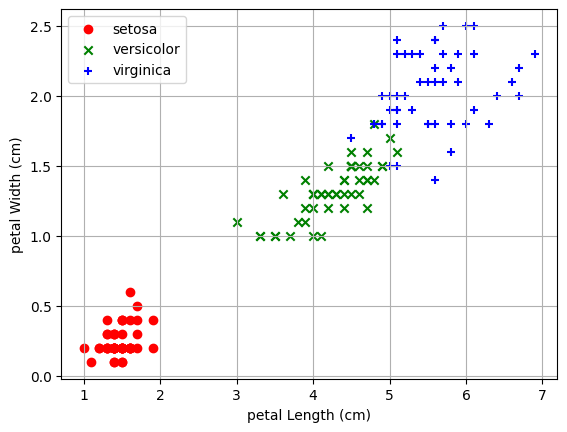

In [23]:
import matplotlib.pyplot as plt
class_setosa = df_data[df_target['target'] == 0]
class_versicolor = df_data[df_target['target'] == 1]
class_virginica = df_data[df_target['target'] == 2]

plt.scatter(class_setosa['petal length (cm)'], class_setosa['petal width (cm)'], label='setosa', c='red')
plt.scatter(class_versicolor['petal length (cm)'], class_versicolor['petal width (cm)'], label='versicolor', c='green',marker='x')
plt.scatter(class_virginica['petal length (cm)'], class_virginica['petal width (cm)'], label='virginica', c='blue',marker='+')
plt.xlabel('petal Length (cm)')
plt.ylabel('petal Width (cm)')
plt.legend()
plt.grid()
plt.show()


## 機械学習


### 問4. データの分割

4.1. iris データを 4:1 に分割して、80% を学習データとして 20% をテストデータとしてください。

ただし、分割した後の変数名は以下の通りにしてください。

| 変数名  |      内容      |
| :-----: | :------------: |
| x_train | 学習用の説明変数 |
| x_test | テスト用の説明変数 |
| y_train | 学習用の目的変数 |
| y_test | テスト用の目的変数 |

学習データでモデルの学習を行い、テストデータでモデルの評価を行います。


In [27]:
from sklearn.model_selection import train_test_split
X = df_data[['petal width (cm)','petal length (cm)']]
y = df_target['target']
X_train, X_test,y_train, y_test= train_test_split(
    X,y,test_size=0.2,random_state=77
)

4.2. 本当に4:1に分割できているか確認しましょう。

In [29]:
X_train.count()

petal width (cm)     120
petal length (cm)    120
dtype: int64

### 問5. 学習

5.1. RandamForest の学習モデルのインスタンスを生成しましょう。

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=77)

5.2. `x_train` と `y_train` を用いて、モデルを学習させましょう。

In [32]:
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

### 問6. 推論


6.1. 学習したモデルに `x_test` を入力して予測をしましょう。

In [38]:
print(pred)

[1 1 2 1 0 2 2 1 0 1 0 2 0 0 0 2 2 2 0 1 0 2 2 1 1 1 2 0 1 1]


6.2. 予測結果と `y_test` に対して、`accuracy` を計算することでモデルを評価しましょう。

In [39]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred)
print(accuracy)

0.9


実は、iris データセットはかなり簡単な分布をしているので、正解率はほぼ 100% になったと思います。